<a href="https://colab.research.google.com/github/priyam197/customer_churn_prediction/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
# pip install pandas numpy matplotlib seaborn scikit-learn


In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [58]:
#Load and preprocess data
df = pd.read_csv('Churn_Modelling.csv')
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

X = df.drop('Exited', axis=1)
y = df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling only for models that need it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# **Logistic Regression**

In [59]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)


Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000

Accuracy: 0.811


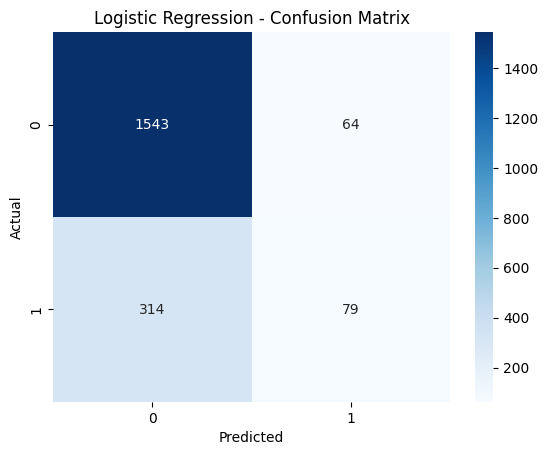

In [60]:
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Classification Report - Logistic Regression")
print(classification_report(y_test, y_pred_lr))
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# **Random Forest**

In [61]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


Classification Report - Random Forest
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.47      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Accuracy: 0.8665


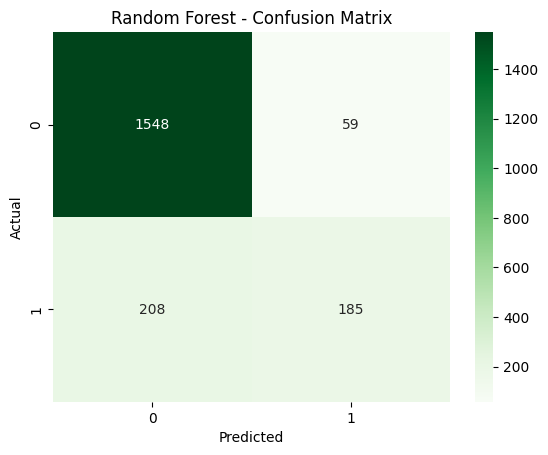

In [62]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# **Gradient Boost**

In [63]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)


Classification Report - Gradient Boosting
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

Accuracy: 0.8675


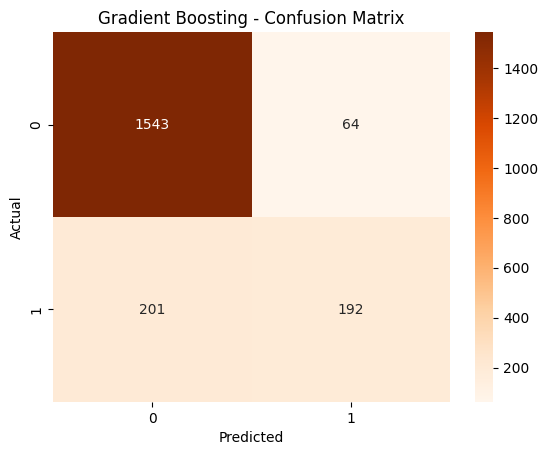

In [64]:
cm_gb = confusion_matrix(y_test, y_pred_gb)
print("Classification Report - Gradient Boosting")
print(classification_report(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Oranges')
plt.title("Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [65]:
model_names = ["Logistic Regression", "Random Forest", "Gradient Boosting"]
accuracies = [
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_gb)

]

summary_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
}).sort_values(by='Accuracy', ascending=False)

print(summary_df)


                 Model  Accuracy
2    Gradient Boosting    0.8675
1        Random Forest    0.8665
0  Logistic Regression    0.8110


# **Model Accuracy Comparison**

<ipython-input-72-5d56afeef0c2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Accuracy', y='Model', data=summary_df, palette='magma')


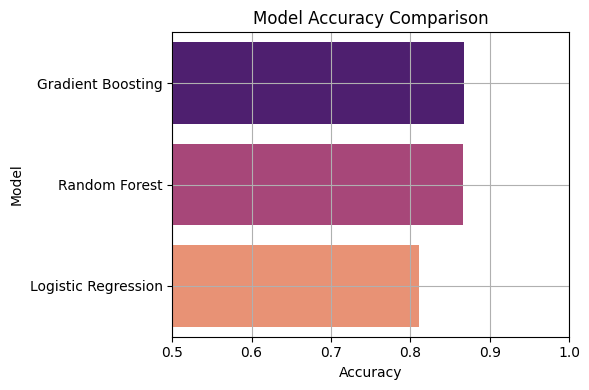

In [72]:
# Bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Accuracy', y='Model', data=summary_df, palette='magma')
plt.title("Model Accuracy Comparison")
plt.xlim(0.5, 1)
plt.xlabel("Accuracy")
plt.ylabel("Model")
plt.grid(True)
plt.tight_layout()
plt.show()
